1. Ознакомьтесь с датасетом образцов эмоциональной речи

    **Toronto emotional speech set (TESS)**:

    https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF

    Ссылка для загрузки данных: https://storage.yandexcloud.net/aiueducation/Content/base/l12/dataverse_files.zip

2. Разберите датасет;
3. Подготовьте и разделите данные на обучающие и тестовые;
4. Разработайте классификатор, показывающий на тесте точность распознавания эмоции не менее 98%;
5. Ознакомьтесь с другим датасетом похожего содержания

    **Surrey Audio-Visual Expressed Emotion (SAVEE)**:

    https://www.kaggle.com/ejlok1/surrey-audiovisual-expressed-emotion-savee

    Ссылка для загрузки данных: https://storage.yandexcloud.net/aiueducation/Content/base/l12/archive.zip

6. Прогоните обученный классификатор на файлах из датасета **SAVEE** по вашему выбору;
7. Сделайте выводы.

In [1]:
import gdown

import os

import re

import librosa

import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import random

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
!gdown https://storage.yandexcloud.net/aiueducation/Content/base/l12/dataverse_files.zip

!unzip -qo dataverse_files.zip
savee_dir = "/content/savee/ALL"

Downloading...
From: https://storage.yandexcloud.net/aiueducation/Content/base/l12/dataverse_files.zip
To: /content/dataverse_files.zip
100% 224M/224M [00:15<00:00, 14.1MB/s]


In [3]:
DATA_DIR = "/content"
# Словарь соответствия эмоциям
EMOTIONS = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'surprise': 5,
    'sad': 6
}
X = []
y = []
# Получаем список всех wav-файлов
wav_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.wav')]
# Обрабатываем каждый файл
for filename in wav_files:
    # Извлечение метки эмоции из имени файла
    label = EMOTIONS.get(filename.split('_')[-1].split('.')[0].lower())
    # Пропускаем, если эмоция не определена
    if label is None:
        continue
    # Загрузка аудиофайла
    audio_data, sample_rate = librosa.load(os.path.join(DATA_DIR, filename), sr=22050)
    # Усреднение по временным кадрам
    mfcc_avg = np.mean((librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)).T, axis=0)
    # Добавление в выборку
    X.append(mfcc_avg)
    y.append(label)
# Преобразуем списки в массивы NumPy
X = np.array(X)
y = np.array(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# One-hot кодирование меток
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_cat),
    verbose=1
)

y_pred = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,103 (203.53 KB)

 Trainable params: 52,103 (203.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6648 - loss: 1.0868 - val_accuracy: 0.9958 - val_loss: 0.0397
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0432 - val_accuracy: 0.9979 - val_loss: 0.0098
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9955 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss

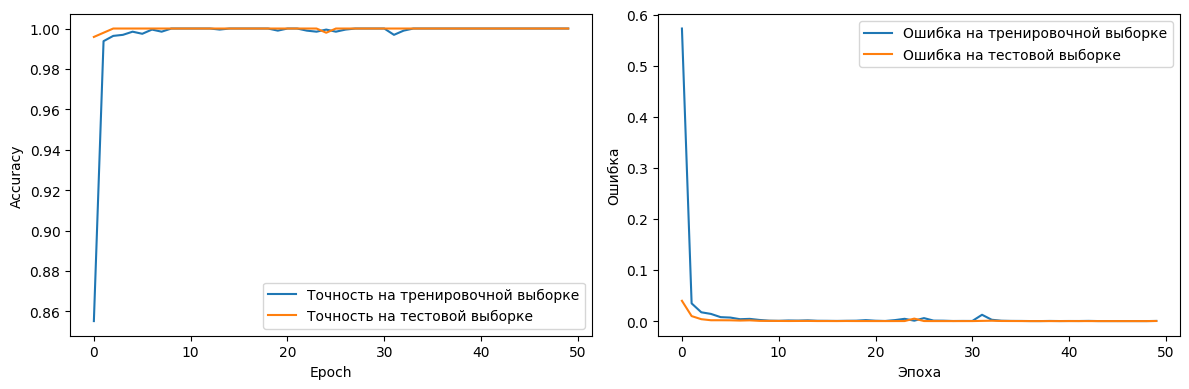

In [12]:
# Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на тренировочной выборке')
plt.plot(history.history['val_accuracy'], label='Точность на тестовой выборке')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Ошибка на тренировочной выборке')
plt.plot(history.history['val_loss'], label='Ошибка на тестовой выборке')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.tight_layout()
plt.show()

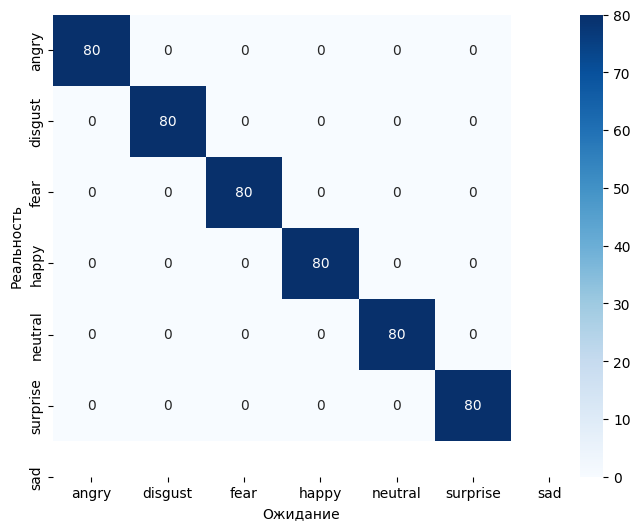

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=EMOTIONS.keys(),
            yticklabels=EMOTIONS.keys())
plt.xlabel('Ожидание')
plt.ylabel('Реальность')
plt.show()

**SAVEE**

In [8]:
!gdown https://storage.yandexcloud.net/aiueducation/Content/base/l12/archive.zip
!unzip -qo archive.zip -d savee

Downloading...
From: https://storage.yandexcloud.net/aiueducation/Content/base/l12/archive.zip
To: /content/archive.zip
100% 113M/113M [00:12<00:00, 8.89MB/s]


In [9]:
# Нормализация обозначений эмоций
EMOTION_MAP = {
    'a': 'angry',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad',
    'su': 'surprise'
}

In [10]:
y_true = []
y_pred_savee = []

# Обработка SAVEE
for filename in os.listdir(savee_dir):
    if not filename.endswith(".wav"):
        continue
    # Извлечение эмоции из имени файла
    name_part = filename.split('_')[-1]
    emotion_part = re.split(r'\d+', name_part)[0].lower()
    emotion = EMOTION_MAP.get(emotion_part)
    if emotion is None:
        print(f"Неизвестная эмоция в файле {filename}: {emotion_part}")
        continue
    label = EMOTIONS.get(emotion)
    if label is None:
        print(f"Нет метки для {emotion}")
        continue
    # Загрузка и обработка аудио
    audio, sr = librosa.load(os.path.join(savee_dir, filename), sr=22050)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfcc_avg = np.mean(mfcc.T, axis=0)
    # Предсказание
    mfcc_scaled = scaler.transform([mfcc_avg])
    pred = model.predict(mfcc_scaled, verbose=0)
    y_true.append(label)
    y_pred_savee.append(np.argmax(pred))

print(f"Обработано файлов SAVEE: {len(y_true)}")

Обработано файлов SAVEE: 480


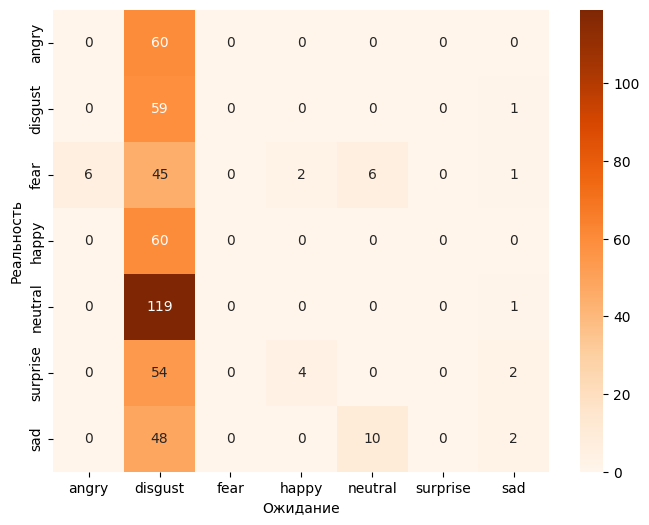

In [11]:
# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_savee), annot=True, fmt='d', cmap='Oranges',
            xticklabels=EMOTIONS.keys(),
            yticklabels=EMOTIONS.keys())
plt.xlabel('Ожидание')
plt.ylabel('Реальность')
plt.show()